In [1]:
import pandas as pd

In [2]:
df_usd_rates = pd.read_csv('../data/USD rates.csv', parse_dates=['StartDate', 'EndDate'])

In [6]:
rates = (100 - df_usd_rates.iloc[1:]['Unnamed: 1']) / 100.
dates = df_usd_rates.iloc[1:][['StartDate', 'EndDate']]
df_eurodoll = pd.DataFrame({
    'rates': rates,
    'StartDate': dates['StartDate'],
    'EndDate': dates['EndDate']
})
df_forward_rates = pd.concat([
    pd.DataFrame(
        df_usd_rates.iloc[:1][['Unnamed: 1', 'StartDate', 'EndDate']].values,
        columns=df_eurodoll.columns
    ),
    df_eurodoll]
)

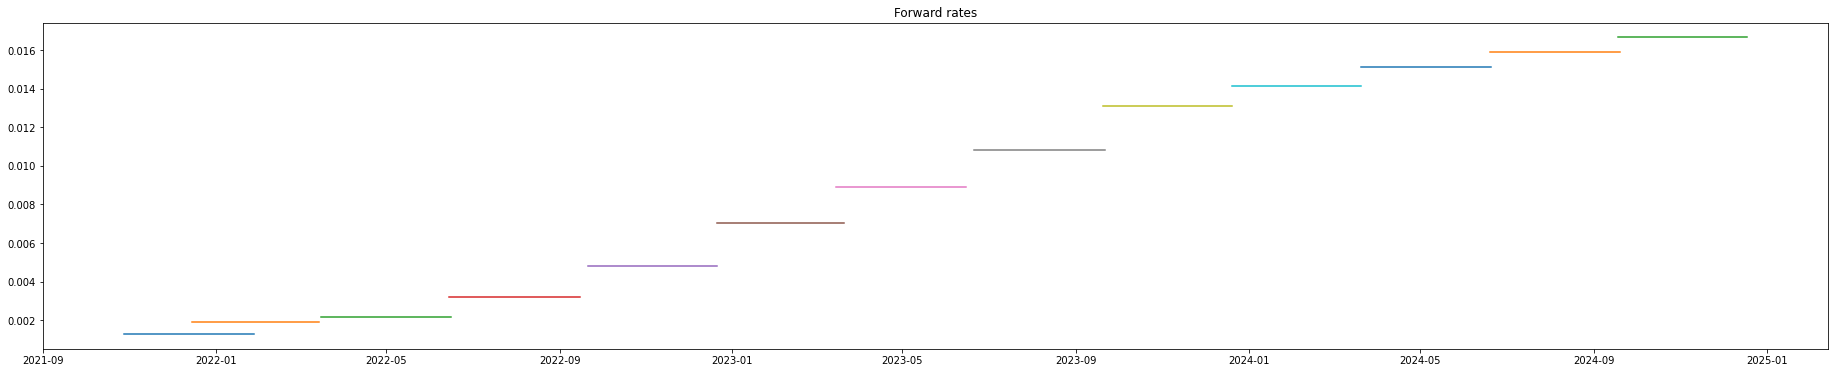

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(32, 6))
for _, row in df_forward_rates.iterrows():
    ax.plot(row[['StartDate', 'EndDate']], row[['rates', 'rates']])
ax.set_title('Forward rates');

In [8]:
def discount_curve(rates: pd.DataFrame):
    n_days = (rates['EndDate'][0] - rates['StartDate'][0]).days / 360
    tenors = [0, (rates['EndDate'][0] - rates['StartDate'][0]).days]
    DFs = [1, 1 / (1 + n_days * rates['Unnamed: 1'][0])]

    for i in range(1, rates.shape[0] - 1):
        F = 1 - rates['Unnamed: 1'][i] / 100 - rates['Conv, adj'][i]
        n_days = (rates['StartDate'][i + 1] - rates['StartDate'][i]).days / 360
        tenors.append((rates['StartDate'][i + 1] - rates['StartDate'][0]).days)
        DFs.append(DFs[-1] / (1 + F * n_days))
    curve = pd.DataFrame({'tenor': tenors, 'discount_factor': DFs})
    return curve

In [9]:
curve = discount_curve(df_usd_rates)

In [10]:
curve

,tenor,discount_factor
0,0,1.000000
1,92,0.999669
2,139,0.999225
3,230,0.998866
4,328,0.998445
5,419,0.997958
6,503,0.997367
7,601,0.996678
8,692,0.996071
9,783,0.995552


Text(0.5, 1.0, 'Discount curve, discrete')

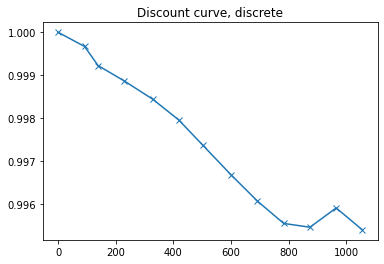

In [26]:
plt.plot('tenor', 'discount_factor', data=curve, marker='x')
plt.title('Discount curve, discrete')

In [13]:
from interpolation import Interpolator

In [14]:
interpolator = Interpolator()

In [19]:
def interpolate_for_days(days):
    res = []
    for day in days:
        res.append(Interpolator.interpolate(list(curve['tenor']), list(curve['discount_factor']), day))
    return res

Text(0.5, 1.0, 'Discount curve')

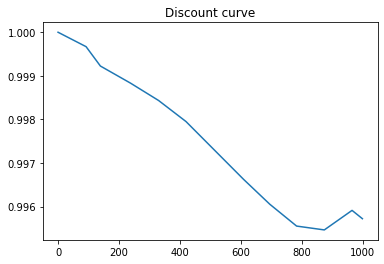

In [25]:
import numpy as np
xs = np.arange(1000)
ys = interpolate_for_days(xs)
plt.plot(xs, ys)
plt.title('Discount curve')